In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os
import torch
import seaborn as sns

In [2]:
train_path = 'Results/train_metrics'
file_list = os.listdir(train_path)
datasets = file_list
datasets

['jaulab_data']

In [5]:
# SELECT THE DATASET
dataset = datasets[0]

In [6]:
n_subjects = 18 # 18
subjects = ['S'+str(n+1) for n in range(n_subjects)]

In [7]:
train_metrics = {}
models = ['CNN', 'FCNN']
sets = ['train', 'val']

key = '17_07'

for model in models:
    for set in sets:
        path = os.path.join(train_path, dataset, set, model+'_'+key)
        file_list = os.listdir(path)
        train_metrics[model+'_'+set] = {}
        for file in file_list:
            for subj in subjects:
                if subj in file:
                    if subj == 'S1':
                        idx = file.index(subj)
                        if file[idx+2] == '_': # si el siguiente caracter al S1 es un barra baja añade al diccionario    
                            loss = json.load(open(os.path.join(path,file), 'r'))
                            train_metrics[model+'_'+set][subj] = loss
                    else:   
                        loss = json.load(open(os.path.join(path,file), 'r'))
                        train_metrics[model+'_'+set][subj] = loss

epocas = len(train_metrics['CNN_train']['S2'])
print(f'Epocas {epocas}')               
                

Epocas 103


In [8]:
def get_subject(n, n_subject):
    subjects = ['S'+str(i+1) for i in range(n_subject)]
    return subjects[n]

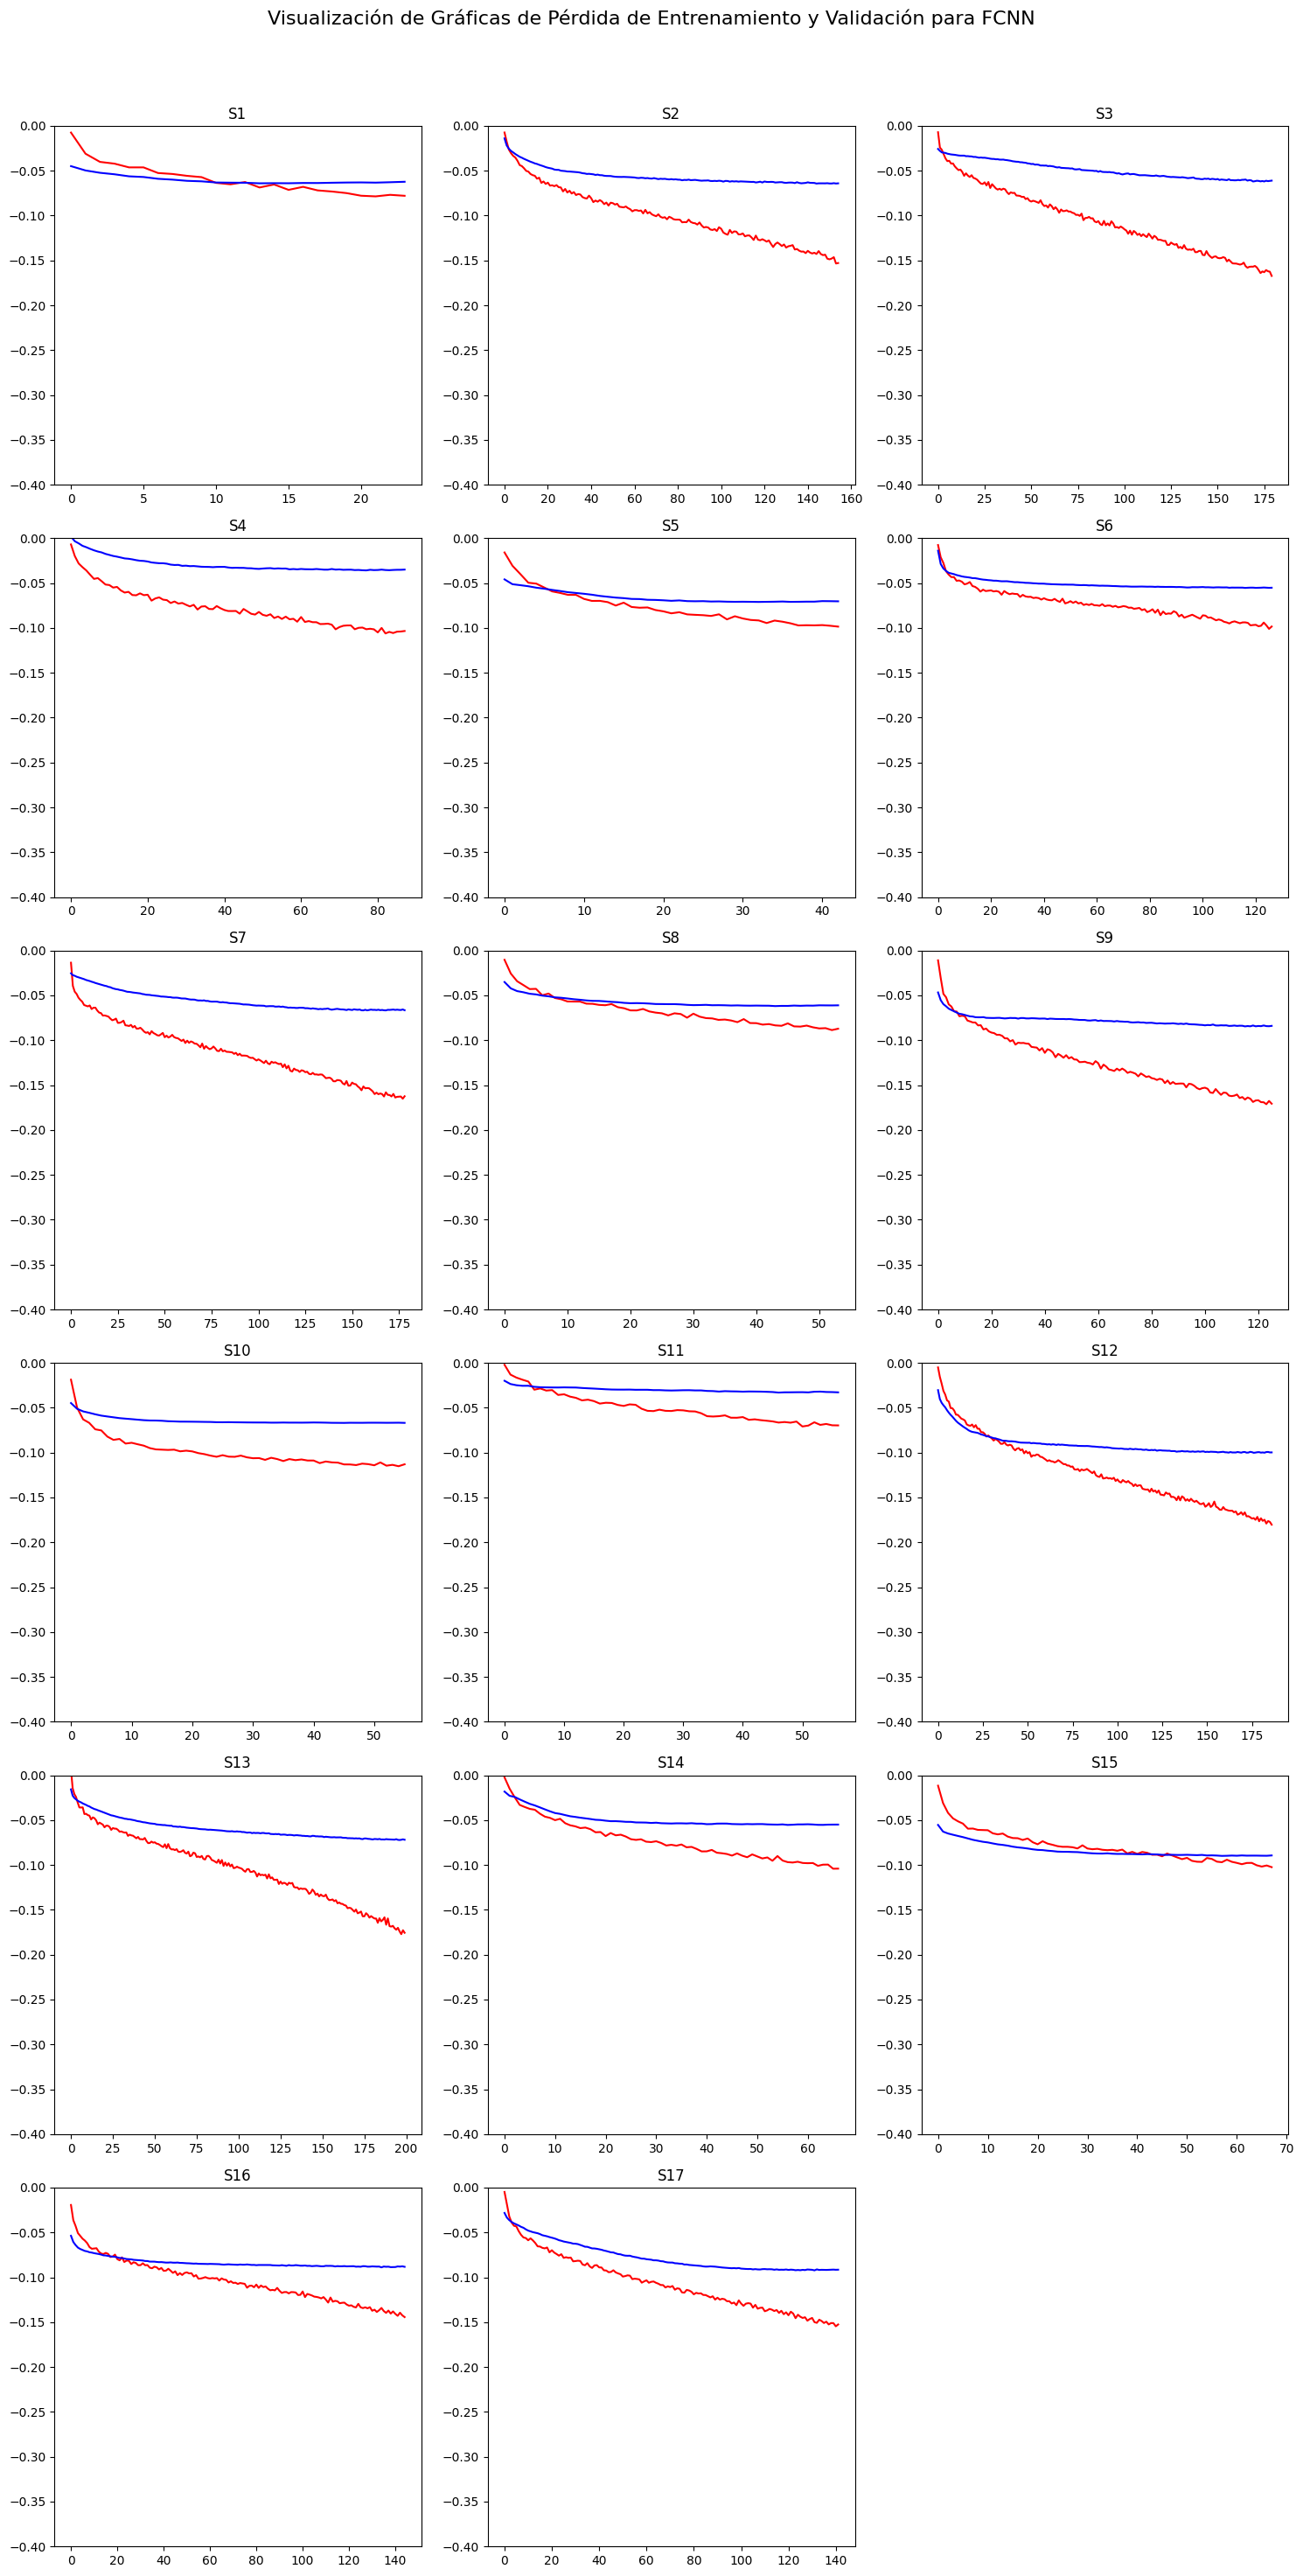

In [17]:
# Seleccionar FCNN o CNN
mode = 'FCNN'
n_subj = len(train_metrics[mode+'_val'])

n_plots = n_subj

# Calcular el número de filas necesarias
n_rows = (n_plots + 2) // 3

# Creo la figura y una matriz de subfiguras
fig, axs = plt.subplots(nrows=n_rows, ncols=3, figsize=(15, 5 * n_rows))

# Aplanar la matriz de subfiguras para un acceso fácil
axs = axs.flatten()

idx = 0
for n in range(n_subj):
    subj = get_subject(n, n_subj)
    train_loss = torch.tensor(train_metrics[mode+'_train'][subj])
    val_loss = torch.tensor(train_metrics[mode+'_val'][subj])
    x = range(len(val_loss))
    
    axs[idx].plot(x, -train_loss, linestyle = '-', color='r')
    axs[idx].plot(x, -val_loss, linestyle = '-', color= 'b')
    axs[idx].set_ylim(-0.4, 0)
    axs[idx].set_title(subj)
    idx += 1

# Eliminar subfiguras vacías si hay menos subfiguras que lugares en la cuadrícula
for ax in axs[idx:]:
    fig.delaxes(ax)

plt.tight_layout()
# Agregar un título general a la figura
fig.suptitle('Visualización de Gráficas de Pérdida de Entrenamiento y Validación para '+ mode, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el layout para dejar espacio para el título

plt.show()

### MOSTRAR DATA POR SUJETO COMPARACIÓN FCNN CON CNN

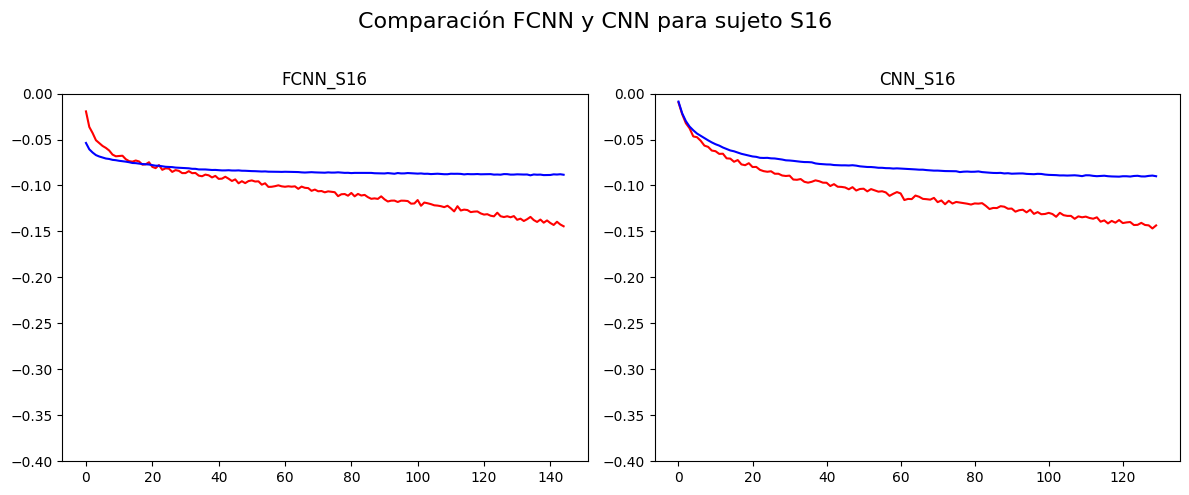

In [18]:
# Seleccionar FCNN o CNN
models = ['FCNN', 'CNN']

# Calcular el número de filas necesarias
n_rows = (n_plots + 2) // 3

# Creo la figura y una matriz de subfiguras
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Aplanar la matriz de subfiguras para un acceso fácil
axs = axs.flatten()

idx = 0

# Select the subject
n = 15
subj = get_subject(n, n_subj)

for n in range(2):
    train_loss = torch.tensor(train_metrics[models[n]+'_train'][subj])
    val_loss = torch.tensor(train_metrics[models[n]+'_val'][subj])
    x = range(len(val_loss))
    
    axs[idx].plot(x, -train_loss, linestyle = '-', color='r')
    axs[idx].plot(x, -val_loss, linestyle = '-', color= 'b')
    axs[idx].set_ylim(-0.4, 0)
    axs[idx].set_title(models[n]+'_'+subj)
    idx += 1

# Eliminar subfiguras vacías si hay menos subfiguras que lugares en la cuadrícula
for ax in axs[idx:]:
    fig.delaxes(ax)

plt.tight_layout()
# Agregar un título general a la figura
fig.suptitle('Comparación FCNN y CNN para sujeto '+ subj, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el layout para dejar espacio para el título

plt.show()

### MOSTRAR RESULTADOS EVALUACIÓN

In [19]:

eval_path = 'Results/eval_metrics'

file_list = os.listdir(eval_path)
datasets = file_list
datasets

['jaulab_data']

In [21]:
# SELECCIONO EL DATASET
dataset = datasets[0]
path = os.path.join(eval_path, dataset)
file_list = os.listdir(path)
file_list

['CNN_17_07_Results',
 'FCNN_17_07_Results',
 'Ridge_17_07_Results',
 'Ridge_Original_17_07_Results']

In [30]:
CNN_Results = json.load(open(os.path.join(eval_path,dataset,file_list[0]),'r'))
FCNN_Results = json.load(open(os.path.join(eval_path,dataset,file_list[1]),'r'))
Ridge_Results = json.load(open(os.path.join(eval_path,dataset,file_list[2]),'r'))
Ridge_Original_Results = json.load(open(os.path.join(eval_path,dataset,file_list[3]),'r'))

In [31]:
n_subjects = len(CNN_Results)
subjects = ['S'+str(n+1) for n in range(n_subjects)]

In [32]:
# MOSTRAR MEDIAS
means = {subj:np.mean(results) for subj, results in Ridge_Results.items()}
means

{'S1': 0.00523962439761658,
 'S2': 0.017380302633319154,
 'S3': 0.01585588177657296,
 'S4': 0.017898933883189968,
 'S5': -0.013011476571963651,
 'S6': -0.016192416614758637,
 'S7': -0.003811935929859851,
 'S8': -0.006087802601824763,
 'S9': 0.015175561654347181,
 'S10': 0.01704387302933854,
 'S11': 0.011762384417885756,
 'S12': 0.0237511626036472,
 'S13': 0.008640877671775259,
 'S14': -0.007933698933004487,
 'S15': 0.026859583447685846,
 'S16': 0.02719674203310835,
 'S17': 0.013582970998335579}

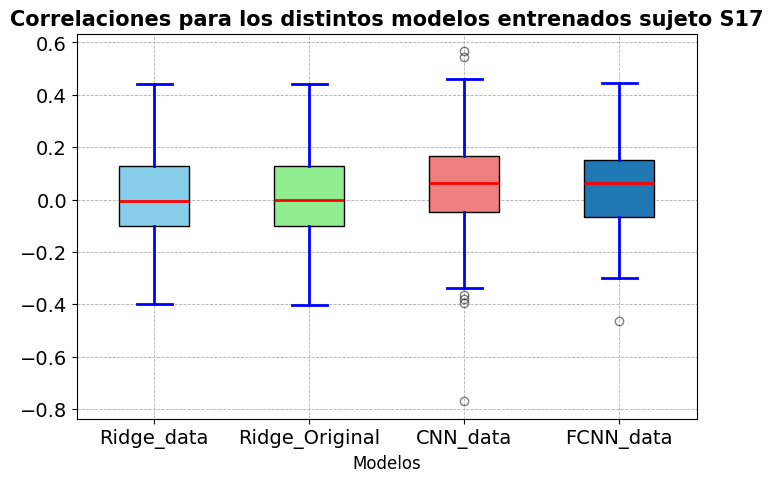

In [39]:
# EJEMPLO POR SUJETO
subj = subjects[16]
CNN_data = CNN_Results[subj]
FCNN_data = FCNN_Results[subj]
Ridge_data = Ridge_Results[subj]
Ridge_Original_data = Ridge_Original_Results[subj]

plt.figure(figsize=(8, 5))  # Tamaño de la figura

# Crear el gráfico de cajas
box = plt.boxplot([Ridge_data, Ridge_Original_data, CNN_data, FCNN_data], vert=True, patch_artist=True)

# Colores personalizados
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Aplicar colores a cada caja
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Personalizar otros elementos del gráfico
for whisker in box['whiskers']:
    whisker.set(color='blue', linewidth=2)

for cap in box['caps']:
    cap.set(color='blue', linewidth=2)

for median in box['medians']:
    median.set(color='red', linewidth=2)

for flier in box['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)

# Añadir título y etiquetas
plt.title('Correlaciones para los distintos modelos entrenados sujeto '+subj, fontsize=15, fontweight='bold')
plt.xlabel('Modelos', fontsize=12)
plt.xticks([1, 2, 3, 4], ['Ridge_data', 'Ridge_Original', 'CNN_data', 'FCNN_data'], fontsize=14)  # Etiquetas personalizadas

# Añadir rejilla para mayor legibilidad
plt.grid(True, linestyle='--', linewidth=0.6)

# Personalizar ejes
plt.tick_params(axis='both', which='major', labelsize=14)

# Mostrar el gráfico
plt.show()

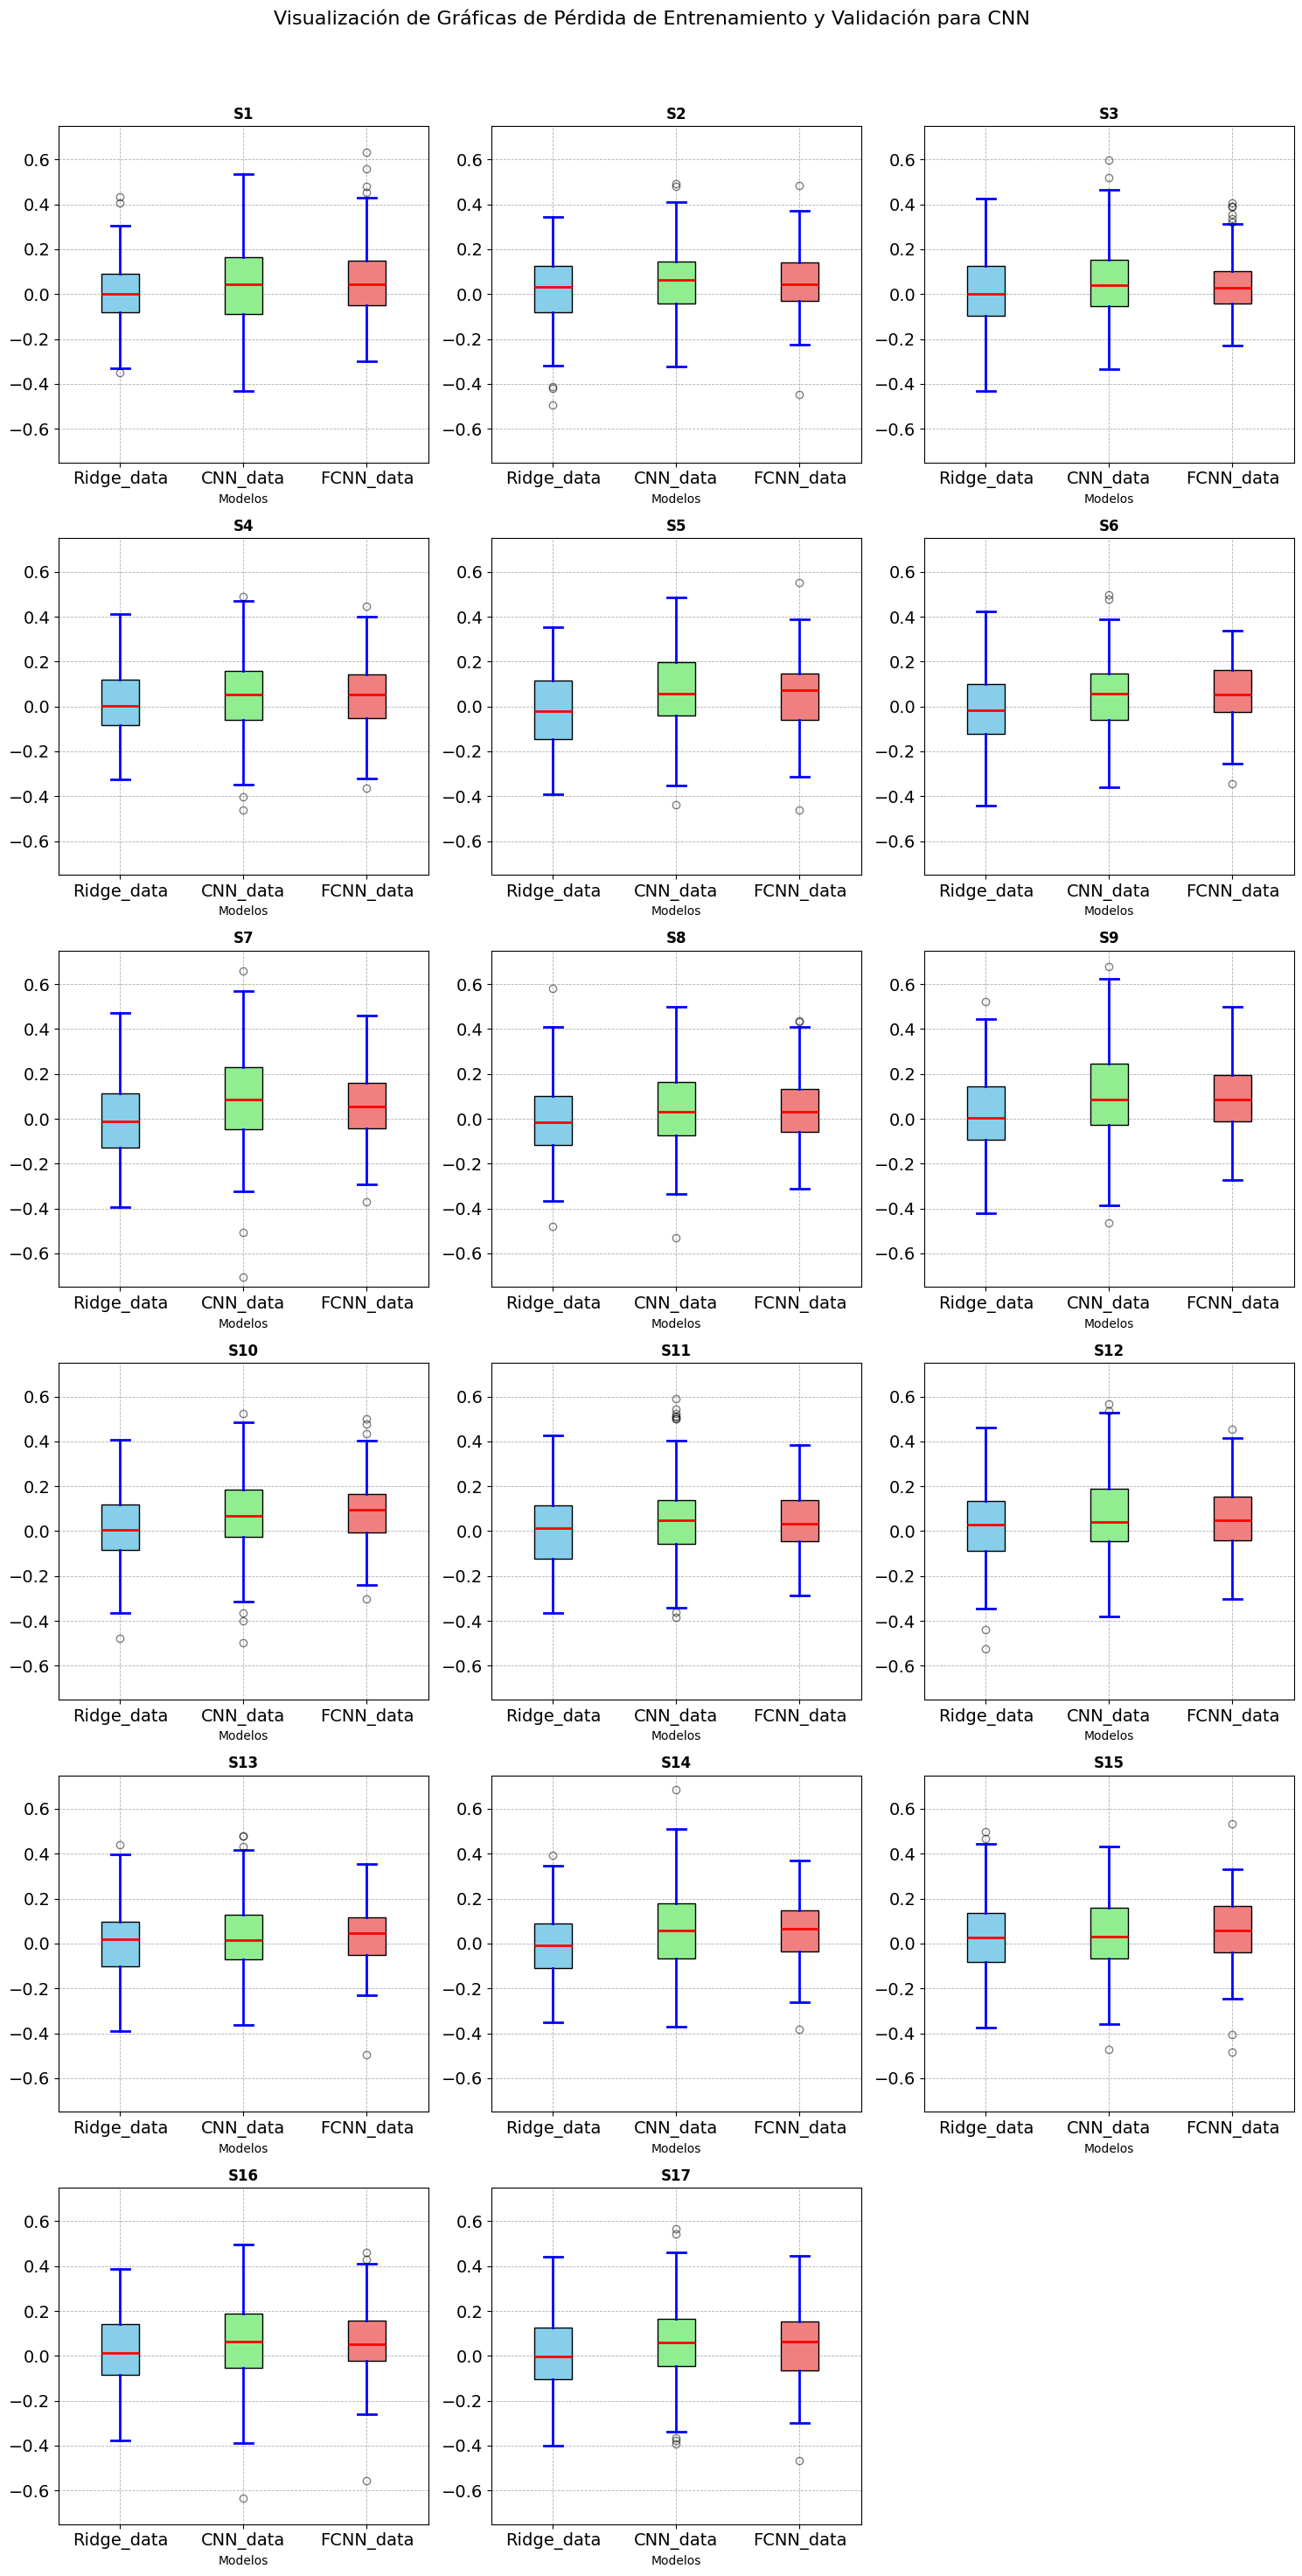

In [65]:
n_plots = len(FCNN_Results.keys())

# Calcular el número de filas necesarias
n_rows = (n_plots + 2) // 3

# Creo la figura y una matriz de subfiguras
fig, axs = plt.subplots(nrows=n_rows, ncols=3, figsize=(15, 5 * n_rows))

# Aplanar la matriz de subfiguras para un acceso fácil
axs = axs.flatten()

for idx, subj in enumerate(dict.keys()):
    
    # CNN_data = list(-np.array(CNN_Results[subj]))
    CNN_data = CNN_Results[subj]
    FCNN_data = FCNN_Results[subj]
    Ridge_data = Ridge_Results[subj]

    box = axs[idx].boxplot([Ridge_data, CNN_data, FCNN_data], vert=True, patch_artist=True)
    
    # Colores personalizados
    colors = ['skyblue', 'lightgreen', 'lightcoral']
    
    # Aplicar colores a cada caja
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    
    # Personalizar otros elementos del gráfico
    for whisker in box['whiskers']:
        whisker.set(color='blue', linewidth=2)
    
    for cap in box['caps']:
        cap.set(color='blue', linewidth=2)
    
    for median in box['medians']:
        median.set(color='red', linewidth=2)
    
    for flier in box['fliers']:
        flier.set(marker='o', color='red', alpha=0.5)
    
    # Añadir título y etiquetas
    axs[idx].set_title(subj, fontweight='bold')
    axs[idx].set_xlabel('Modelos')
    axs[idx].set_xticks([1, 2, 3], ['Ridge_data', 'CNN_data', 'FCNN_data'])  # Etiquetas personalizadas
    axs[idx].set_ylim([-0.75, 0.75])
    
    # Añadir rejilla para mayor legibilidad
    axs[idx].grid(True, linestyle='--', linewidth=0.6)
    
    # Personalizar ejes
    axs[idx].tick_params(axis='both', which='major', labelsize=14)

# Eliminar subfiguras vacías si hay menos subfiguras que lugares en la cuadrícula
for ax in axs[idx+1:]:
    fig.delaxes(ax)

plt.tight_layout()
# Agregar un título general a la figura
fig.suptitle('Visualización de Gráficas de Pérdida de Entrenamiento y Validación para '+ mode, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el layout para dejar espacio para el título

plt.show()

### DECODING ACCURACIES

In [100]:
# Cargo los diccionarios:
def get_times(dataset, model):
    path = os.path.join('Results/decode_accuracy/', dataset+'_data' , model)
    file_list = os.listdir(path)
    times = {int(int(file.split('_')[2]) / 64): json.load(open(os.path.join(path, file),'r')) for file in file_list}
    ordered_keys = sorted(times.keys())
    times_ordered = {key: times[key] for key in ordered_keys}
    return times_ordered

print(get_times('jaulab', 'CNN'))

{2: [56.98924731182796, 62.903225806451616, 48.924731182795696, 48.38709677419355, 53.2258064516129, 56.451612903225815, 56.98924731182796, 47.31182795698925, 52.68817204301075, 53.2258064516129, 52.68817204301075, 53.76344086021505, 51.61290322580645, 51.61290322580645, 54.83870967741935, 48.924731182795696, 55.91397849462365], 10: [55.26315789473685, 65.78947368421053, 42.10526315789473, 52.63157894736842, 65.78947368421053, 57.89473684210527, 68.42105263157895, 55.26315789473685, 78.94736842105263, 57.89473684210527, 57.89473684210527, 71.05263157894737, 60.526315789473685, 47.368421052631575, 55.26315789473685, 47.368421052631575, 65.78947368421053], 25: [53.333333333333336, 80.0, 60.0, 46.666666666666664, 73.33333333333333, 73.33333333333333, 66.66666666666666, 46.666666666666664, 73.33333333333333, 66.66666666666666, 66.66666666666666, 73.33333333333333, 53.333333333333336, 60.0, 53.333333333333336, 73.33333333333333, 80.0]}


In [110]:
dataset = 'jaulab'
models = ['Ridge_original', 'Ridge', 'FCNN', 'CNN']
model_info = {model: get_times(dataset, model) for model in models}

In [103]:
# diccionario agrupando por índices de tiempo y modelos
time_keys = model_info[models[0]].keys()
print(time_keys)
times_info = {time: {model: model_info[model][time] for model in models} for time in time_keys}

dict_keys([2, 10, 25])


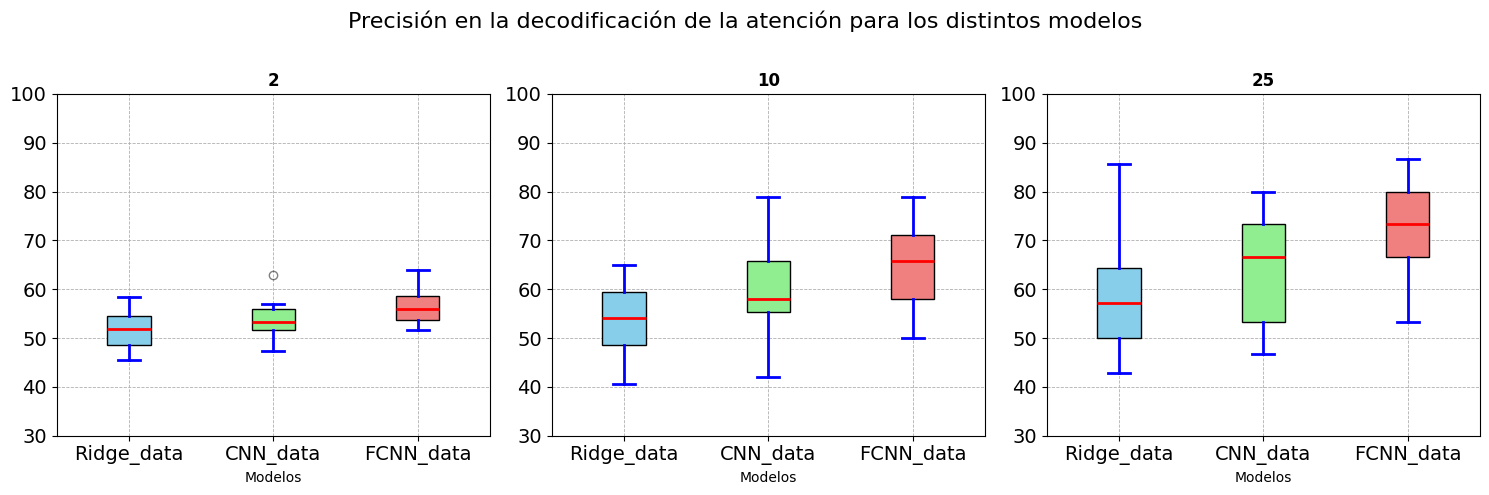

In [104]:
dict = times_info

n_plots = len(dict.keys())

# Calcular el número de filas necesarias
n_rows = (n_plots + 2) // 3

# Creo la figura y una matriz de subfiguras
fig, axs = plt.subplots(nrows=n_rows, ncols=3, figsize=(15, 5 * n_rows))

# Aplanar la matriz de subfiguras para un acceso fácil
axs = axs.flatten()

for n, (idx, model_info) in enumerate(times_info.items()):

    box = axs[n].boxplot([model_info['Ridge'], model_info['CNN'], model_info['FCNN']], vert=True, patch_artist=True)
    
    # Colores personalizados
    colors = ['skyblue', 'lightgreen', 'lightcoral']
    
    # Aplicar colores a cada caja
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    
    # Personalizar otros elementos del gráfico
    for whisker in box['whiskers']:
        whisker.set(color='blue', linewidth=2)
    
    for cap in box['caps']:
        cap.set(color='blue', linewidth=2)
    
    for median in box['medians']:
        median.set(color='red', linewidth=2)
    
    for flier in box['fliers']:
        flier.set(marker='o', color='red', alpha=0.5)
    
    # Añadir título y etiquetas
    axs[n].set_title(idx, fontweight='bold')
    axs[n].set_xlabel('Modelos')
    axs[n].set_xticks([1, 2, 3], ['Ridge_data', 'CNN_data', 'FCNN_data'])  # Etiquetas personalizadas
    axs[n].set_ylim([30,100])
    
    # Añadir rejilla para mayor legibilidad
    axs[n].grid(True, linestyle='--', linewidth=0.6)
    
    # Personalizar ejes
    axs[n].tick_params(axis='both', which='major', labelsize=14)

# Eliminar subfiguras vacías si hay menos subfiguras que lugares en la cuadrícula
for ax in axs[n+1:]:
    fig.delaxes(ax)

plt.tight_layout()
# Agregar un título general a la figura
fig.suptitle('Precisión en la decodificación de la atención para los distintos modelos', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el layout para dejar espacio para el título

plt.show()

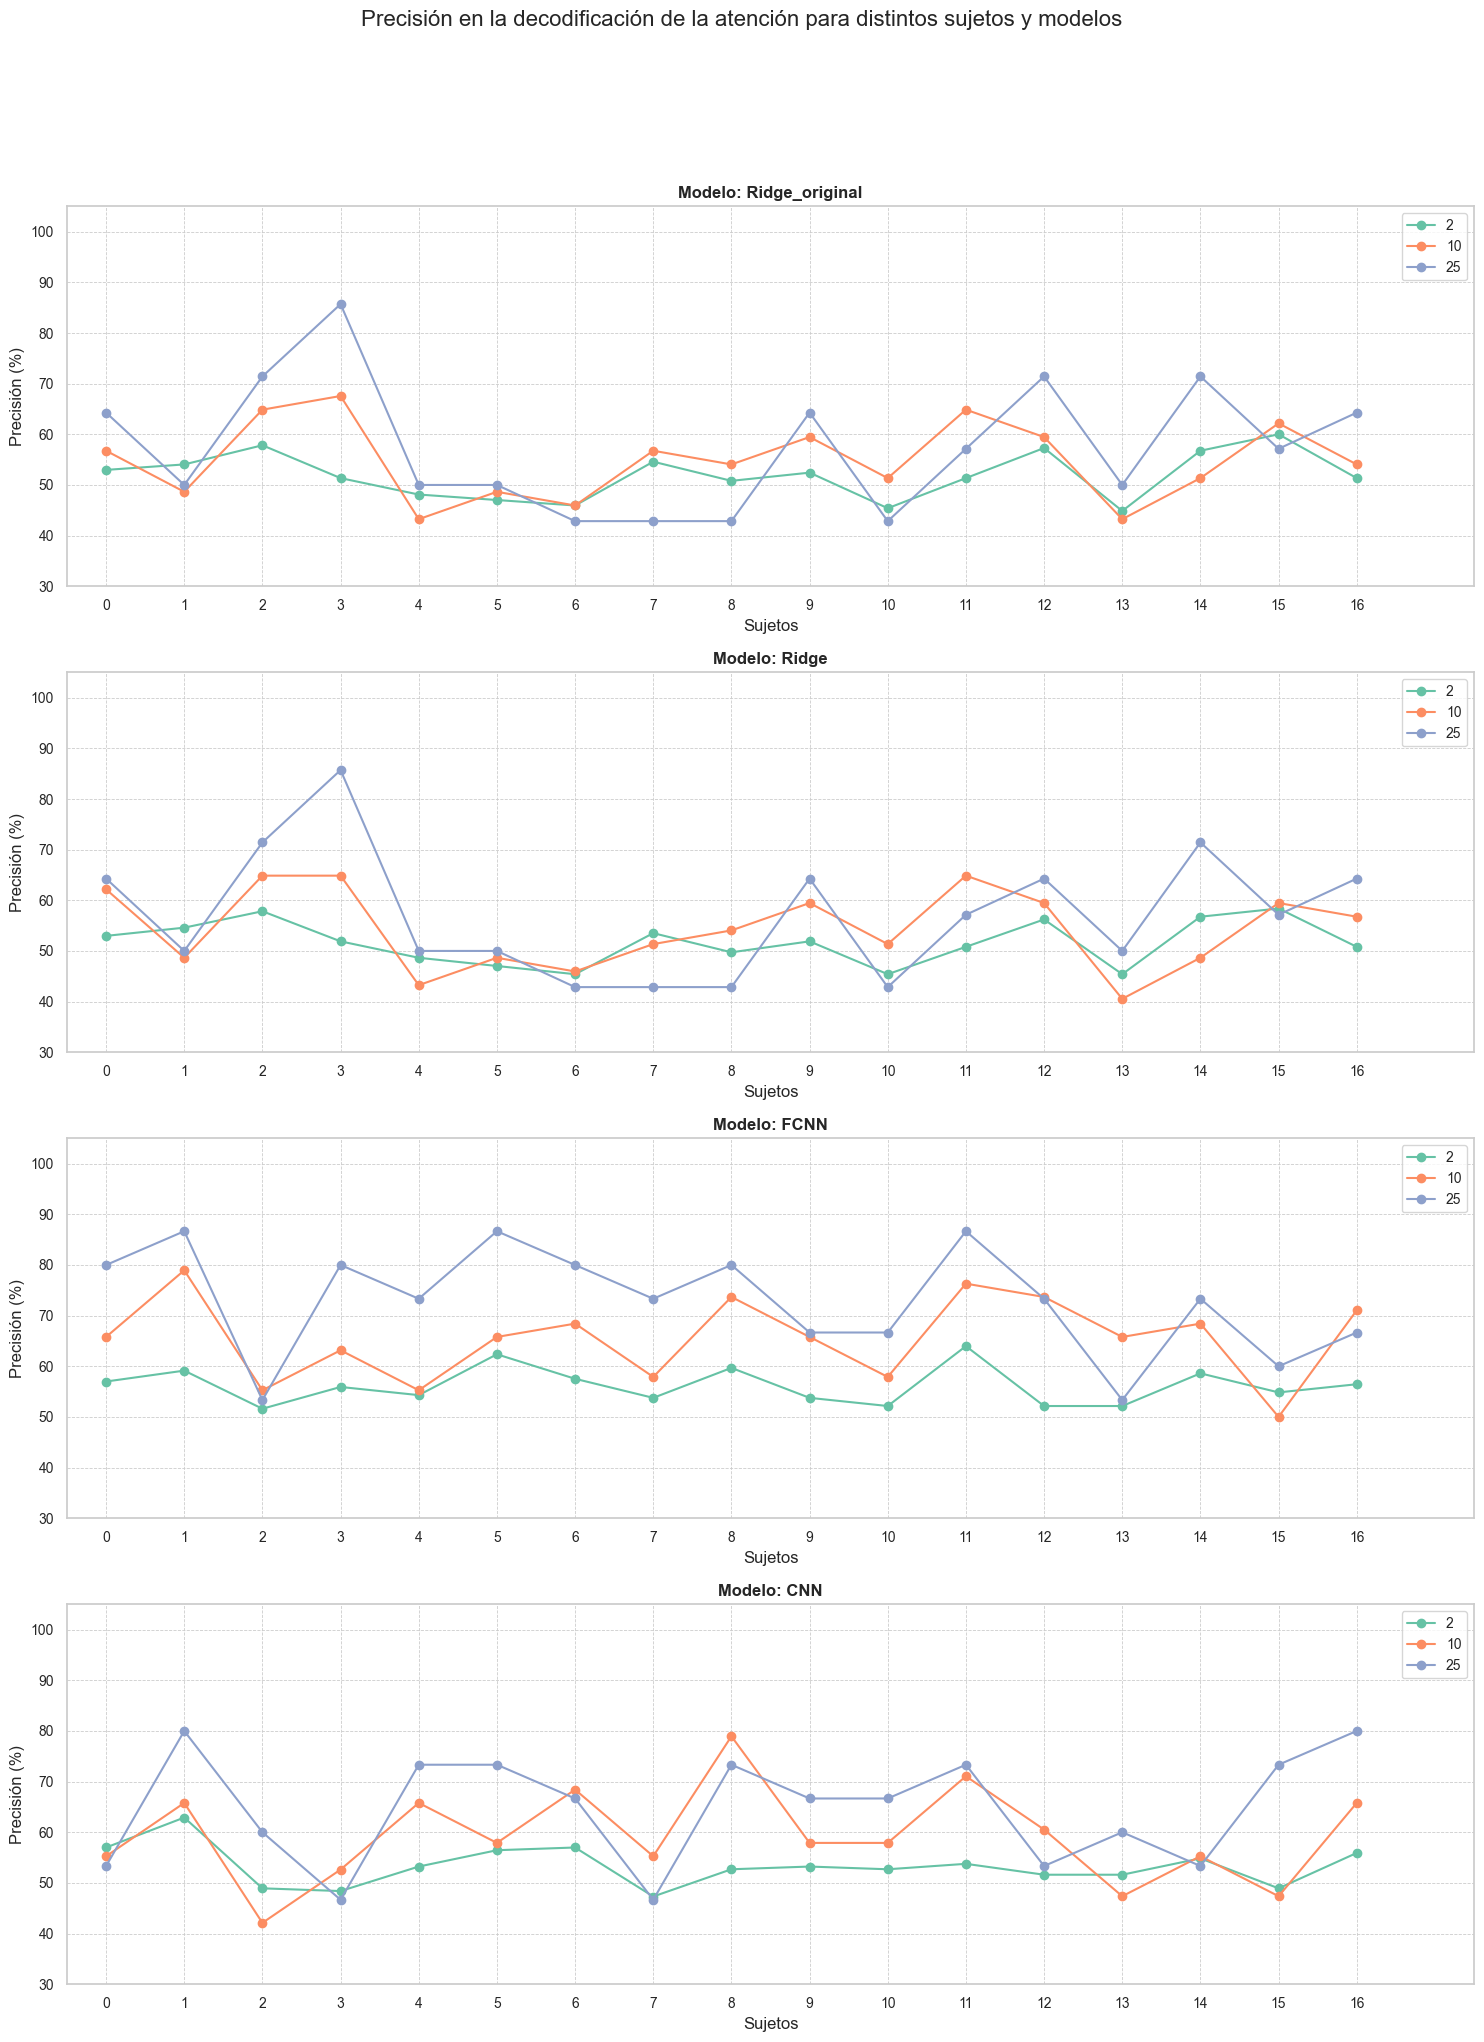

In [111]:
dict = model_info

# Establecer estilo de seaborn
sns.set(style="whitegrid")

# Crear la figura y una matriz de subfiguras
fig, axs = plt.subplots(nrows=len(model_info), ncols=1, figsize=(15, 5 * len(model_info)))

# Aplanar la matriz de subfiguras para un acceso fácil
if len(model_info) == 1:
    axs = [axs]  # Convertir en lista si es un solo subplot
else:
    axs = axs.flatten()

# Paleta de colores de seaborn
colors = sns.color_palette("Set2", len(time_keys))  # Tres colores diferentes

# Crear las subfiguras
for n, (idx, times_info) in enumerate(model_info.items()):
    
    x = range(len(times_info[list(time_keys)[0]]))

    for i, time in enumerate(list(time_keys)):
        axs[n].plot(x, times_info[time], linestyle='-', marker='o', color=colors[i], label=time)
    
    # Añadir título y etiquetas
    axs[n].set_title(f'Modelo: {idx}', fontweight='bold')
    axs[n].set_xlabel('Sujetos', fontsize=12)
    axs[n].set_ylabel('Precisión (%)', fontsize=12)
    axs[n].set_ylim([30, 105])
    axs[n].set_xlim([-0.5, 17.5])
    
    # Añadir rejilla para mayor legibilidad
    axs[n].grid(True, linestyle='--', linewidth=0.6)
    
    # Personalizar ejes
    axs[n].tick_params(axis='both', which='major', labelsize=10)
    
    # Configurar el eje x para mostrar números enteros
    axs[n].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # Configurar el eje x para mostrar números enteros y todos los índices
    axs[n].set_xticks(x)
    axs[n].set_xticklabels(x)
    
    # Añadir leyenda
    axs[n].legend(loc='best', fontsize=10)

# Eliminar subfiguras vacías si hay menos subfiguras que lugares en la cuadrícula
if len(model_info) < len(axs):
    for ax in axs[len(model_info):]:
        fig.delaxes(ax)

# Ajustar el layout
plt.tight_layout()
# Agregar un título general a la figura
fig.suptitle('Precisión en la decodificación de la atención para distintos sujetos y modelos', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el layout para dejar espacio para el título

# Mostrar la gráfica
plt.show()